In [1]:
!pip install datasets

  Using cached datasets-2.18.0-py3-none-any.whl (510 kB)
  Using cached dill-0.3.8-py3-none-any.whl (116 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl (134 kB)


In [2]:
from datasets import load_dataset
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
REPO = 'Annanay/aml_song_lyrics_balanced'
dataset = load_dataset(REPO)

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [5]:
train, test = dataset.values()

In [6]:
total_num_entries = len(train) + len(test)
print(f"There are a total of {total_num_entries} entries in our dataset.\n{len(train)/total_num_entries*100:.2f}% is training and {len(test)/total_num_entries*100:.2f} is testing.")

There are a total of 14735 entries in our dataset.
82.77% is training and 17.23 is testing.


Note we should make a validation set later and this should be 15% of the total data taken from the train set

In [7]:
train, test = pd.DataFrame(train), pd.DataFrame(test)

In [8]:
df = pd.concat([train.copy(), test.copy()])
df

,Unnamed: 0,lyrics_filename,mood,lyrics,mood_cats
0,0,Five_Finger_Death_Punch___Bulletproof,anger,"""Bulletproof Lyrics[Verse 1]\nYou can take mon...",3
1,1,Karen_O_And_The_Kids___Hideaway,sad,"""Hideaway LyricsHideaway\nWell, they'll seat u...",1
2,2,ATB___These_Days,happy,"""These Days Lyrics[Verse 1]\nLet's take the lo...",0
3,3,Brian_Poole__The_Tremeloes___Do_You_Love_Me,happy,"""Main Street Chapter XXXI LyricsI\nTheir night...",0
4,4,Aretha_Franklin___Freeway_Of_Love,happy,"""Freeway of Love Lyrics[Verse 1]\nKnew you'd b...",0
...,...,...,...,...,...
2534,3823,Bobby_Vee___More_Than_I_Can_Say,happy,"""More Than I Can Say LyricsWo-oh yay yay\nLove...",0
2535,7659,Eastmountainsouth___Ghost,sad,"""Ghost LyricsThe ghost of you\nHas almost fade...",1
2536,3428,Blackmores_Night___Waiting_just_for_you,happy,"""Waiting Just for You LyricsThey say that it's...",0
2537,9973,Gillian_Welch___Revelator,sad,"""Revelator Lyrics[Verse 1]\nDarling, remember\...",1


In [9]:
df = df.sample(frac=1).reset_index(drop=True)
df

,Unnamed: 0,lyrics_filename,mood,lyrics,mood_cats
0,1703,David_Poe___The_Drifter,sad,"""The Drifter LyricsYou took me like a drifter ...",1
1,6088,Death_Cab_for_Cutie___Soul_Meets_Body,happy,"""Soul Meets Body Lyrics[Verse 1]\nI want to li...",0
2,3231,Gil_ScottHeron___Whitey_On_The_Moon,calm,"'Whitey on the Moon LyricsWe have a poem here,...",2
3,6742,Cult_Of_Luna___The_Watchtower,sad,"""The Watchtower LyricsThrough times I thought ...",1
4,5459,Alien_Ant_Farm___Tia_Lupe,happy,"""Tia Lupé LyricsShe traps a velvet moth betwee...",0
...,...,...,...,...,...
14730,4153,Govt_Mule___Beautifully_Broken,sad,"""Beautifully Broken LyricsMysterious - blown i...",1
14731,3064,Beady_Belle___Never_Mind,calm,"""Never Mind LyricsYou know better than I\nWhat...",2
14732,2699,Belinda_Carlisle___Love_In_The_Key_Of_C,calm,"""Love in the Key of C Lyrics[Verse 1]\nI've be...",2
14733,9507,Elliott_Smith___245_am,anger,"""2:45 AM Lyrics[Verse 1]\nI'm going out sleepw...",3


In [10]:
df = df.drop_duplicates(subset='lyrics_filename', keep='first')

In [11]:
df.drop(inplace=True, columns=['Unnamed: 0', 'mood'])

<ipython-input-11-ec47d647a57c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(inplace=True, columns=['Unnamed: 0', 'mood'])


In [12]:
df['lyrics'].str.match('.*Lyrics.*').sum()

10153

In [13]:
df['lyrics'] = df['lyrics'].str.replace('.*Lyrics', ' ', n=1, regex=True)
df['lyrics'].str.match('.*Lyrics.*').sum()

<ipython-input-13-71425bde8909>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('.*Lyrics', ' ', n=1, regex=True)


0

In [14]:
df['lyrics'].str.match('.*\[[^\]]*\].*|.*\{[^\]]*\}.*').sum()

4846

In [15]:
df['lyrics'] = df['lyrics'].str.replace('\[[^\]]*\]|\{[^\]]*\}', ' ', regex=True)
df['lyrics'].str.match('.*\[[^\]]*\].*|.*\{[^\]]*\}.*').sum()

<ipython-input-15-f1a22c2d53d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('\[[^\]]*\]|\{[^\]]*\}', ' ', regex=True)


0

In [16]:
df['lyrics'] = df['lyrics'].str.replace('\\n', ' ', regex=False)

<ipython-input-16-72f2c3bce24d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('\\n', ' ', regex=False)


In [17]:
df['lyrics'] = df['lyrics'].str.replace("[1-9]*Embed['\"],\s['\"]default['\"]$", ' ', regex=True)

<ipython-input-17-72e0a66dadd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace("[1-9]*Embed['\"],\s['\"]default['\"]$", ' ', regex=True)


In [18]:
df['lyrics'] = df['lyrics'].str.replace("You might also like", ' ', regex=True)

<ipython-input-18-30a94c5bf3ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace("You might also like", ' ', regex=True)


In [19]:
df['lyrics'] = df['lyrics'].str.replace('See.*LiveGet tickets as low as \$[1-9]*', ' ', regex=True)

<ipython-input-19-b00ddb781fdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('See.*LiveGet tickets as low as \$[1-9]*', ' ', regex=True)


In [20]:
df[df['lyrics'].str.match('.*Verse.*', case=False)]

,lyrics_filename,lyrics,mood_cats
93,Dismantled___Get_it_Through,"Here's a beat, it is a solid beat And no one'...",3
162,Depeche_Mode___Halo,You wear guilt Like shackles on your feet L...,1
169,Amanda_Marshall___Ill_Be_Okay,Verse 1 Its time to let ya go It's time to sa...,2
216,A_Perfect_Circle___Judith_edited,Let us look at those Scriptures which provide...,3
228,Jay_Munly___Big_Black_Bull_Comes_Like_A_Caesar,As we there are where are we are we there fro...,1
...,...,...,...
14447,City_And_Colour___The_Girl,I wish I could do better by you Cause that'...,0
14469,A_Fine_Frenzy___Lifesize,We stood so tall we caught a plane By the w...,0
14501,Anathema___Everwake,Somniferous whisperings of scarlet fields S...,1
14546,Blondie___Dragonfly,Greetings ladies and gentlemen of Earth and...,1


In [21]:
df['lyrics'] = df['lyrics'].str.replace('[vV]erse [1-9]*', ' ', regex=True)

<ipython-input-21-f0d3b573907c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('[vV]erse [1-9]*', ' ', regex=True)


In [22]:
df[df['lyrics'].str.match('.*Verse.*', case=False)]

,lyrics_filename,lyrics,mood_cats
216,A_Perfect_Circle___Judith_edited,Let us look at those Scriptures which provide...,3
228,Jay_Munly___Big_Black_Bull_Comes_Like_A_Caesar,As we there are where are we are we there fro...,1
530,Cephalic_Carnage___GLobal_OVerhaul_DEvice,"My life was too absurd, the way that I tainte...",3
604,Junior_Boys___Parallel_Lines,"If you found the words, would you really say ...",1
612,And_You_Will_Know_Us_By_The_Trail_Of_Dead___Ho...,Looking back in time Through verses set in nu...,3
...,...,...,...
13459,Hot_Hot_Heat___Bandages_Rhapsody_Originals,THE TASK. BOOK I. THE SOFA. I sing th...,1
13615,Japan___Television,I apologise again Time after time after tim...,0
14204,Aretha_Franklin___Never_Let_Me_Go__LP_Version,Royce - can we expect another Bad Meets Evil ...,0
14314,Immortal_Technique___Creation__Destruction,Yeah Haha Se ha cabado la mierda Bout to dr...,1


In [23]:
df[df['lyrics'].str.contains('chorus')]

,lyrics_filename,lyrics,mood_cats
228,Jay_Munly___Big_Black_Bull_Comes_Like_A_Caesar,As we there are where are we are we there fro...,1
359,Bread___Make_It_With_You_LP_Version,"Album Version Dirty * Intro Ooh, yeah, yeah ...",0
447,Andrew_Bird___Souverian,Though bells will ring Church steeples were c...,1
815,Apoptygma_Berzerk___Lost_In_Translation,Fragile you are And yet the strongest by far ...,1
1001,AHa___The_Swing_Of_Things_Album_Version,"Hi, I’m the Rap Critic. Let’s talk about Ja R...",3
1036,Dina_Carroll___Dont_Be_A_Stranger,I shouldn't be alone with you tonight Desire ...,0
1081,Jewel___2_Find_U_Album_Version,Abstract This essay examines spaces within h...,3
1342,Justin_Timberlake_Featuring_Timbaland___SexyBack,I'm bringin' sexy back Yeah Them other boys...,0
1527,Cat_Power___Lived_In_Bars,We've lived in bars and danced on tables Hote...,1
1546,Guttermouth___I_Read_It_On_A_Bathroom_Wall_In_...,chorus Im so bored Get on board Im so bored G...,0


In [24]:
df['lyrics'] = df['lyrics'].str.replace('[cC]horus [1-9]*', ' ', regex=True)

<ipython-input-24-bafc29831258>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('[cC]horus [1-9]*', ' ', regex=True)


In [25]:
df['lyrics'] = df['lyrics'].str.replace('intro', ' ', case=False)
df['lyrics'] = df['lyrics'].str.replace('outro', ' ', case=False)

<ipython-input-25-b359605a1a3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('intro', ' ', case=False)
<ipython-input-25-b359605a1a3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('outro', ' ', case=False)


In [26]:
df['lyrics'] = df['lyrics'].str.replace('x[1-9]*', ' ', regex=True)

<ipython-input-26-9774ba08eebb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('x[1-9]*', ' ', regex=True)


In [27]:
df[df['lyrics'].str.match('.*x[1-9]*', case=False)]

,lyrics_filename,lyrics,mood_cats
85,Children_Of_Bodom___Sixpounder,Can you say what you can't do In darkness of ...,3
228,Jay_Munly___Big_Black_Bull_Comes_Like_A_Caesar,As we there are where are we are we there fro...,1
527,At_The_DriveIn___Rolodex_Propaganda,Pinch history feel the pinch blistering Pin...,0
568,Finley_Quaye___Sweet_And_Loving_Man,You got to make it on your own You're so alon...,2
770,Big_Daddy_Weave___Words_Of_Life_Album_Version,"Thank you. Thank you, thank you, thank you......",3
...,...,...,...
14172,Chrisette_Michele___Notebook,I'm feelin' you You feelin' me But still we...,1
14204,Aretha_Franklin___Never_Let_Me_Go__LP_Version,Royce - can we e pect another Bad Meets Evil ...,0
14352,James_LaBrie___Listening,Hot topic is the way that we rhyme Hot topi...,0
14395,Arcadia___All_Out_Of_Love,OF THE RESOLUTION DON QUIXOTE FORMED TO TURN ...,0


In [28]:
df[df['lyrics'].str.contains('part [1-9]', case=False)]

,lyrics_filename,lyrics,mood_cats
496,Brian_Wilson___Surfs_Up,- Part 1 - A diamond necklace played the p...,0
2125,Dance_Gavin_Dance___People_You_Know,Part 1: People You Know Someone please! Pl...,3
2239,John_Carpenter___Seasons,Lupe Fiasco - Tetsuo and Youth Joey Bada$$ - ...,1
2783,Amii_Stewart___Knock_On_The_Wood,CHIC - Le Freak 2018 Remaster Sylvester - You...,0
8184,Black_Eyed_Peas___Positivity,Part 1: You gotta keep it on the positive ...,0
13218,Ben_Jelen___River,1. Like a Rolling Stone by Bob Dylan 2. Satis...,1
14204,Aretha_Franklin___Never_Let_Me_Go__LP_Version,Royce - can we e pect another Bad Meets Evil ...,0


In [29]:
df['lyrics'] = df['lyrics'].str.replace('Part [1-9]', ' ', regex=True)

<ipython-input-29-df3a4a91351b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('Part [1-9]', ' ', regex=True)


In [30]:
df.head()

,lyrics_filename,lyrics,mood_cats
0,David_Poe___The_Drifter,You took me like a drifter takes a friend I'l...,1
1,Death_Cab_for_Cutie___Soul_Meets_Body,I want to live where soul meets body And le...,0
2,Gil_ScottHeron___Whitey_On_The_Moon,"We have a poem here, it\'s called ""Whitey On ...",2
3,Cult_Of_Luna___The_Watchtower,Through times I thought of what we created Fo...,1
4,Alien_Ant_Farm___Tia_Lupe,She traps a velvet moth between her harmless ...,0


In [31]:
for i in range(15, 21):
  print(df['lyrics'][i])

 One evening fair I took the air Down by Blackwater side \'Twas gazing all around me When the Irish lad I spied  All through the first part of that night We did lie in sport and play Then this young man arose and gathered his clothes And said, "Fare ye well, I am away"  That\'s not the promise you gave to me When first you lay on my breast You made me believe with your lying tongue That the sun rose in the west Go home, go home to your father\'s garden Go home and weep your fill And think upon your own misfortune That you brought with your wanton will  There\'s not one girl in this whole town As easily led as I When the sky does fall and the seas run dry Why it\'s then you\'ll marry I  
   Ever since I was young your word is the word that always won Worry and wake the ones you love A phone call I'd rather not receive Please use my body while I sleep My lungs are fresh and yours to keep Kept clean and they will let you breathe    Is this the way a toy feels when its batteries run dry? I

In [32]:
df['lyrics'] = df['lyrics'].str.replace('[cC]horus [1-9]*', ' ', regex=True, case=False)

<ipython-input-32-a7ffa1f8f3b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('[cC]horus [1-9]*', ' ', regex=True, case=False)


In [33]:
df

,lyrics_filename,lyrics,mood_cats
0,David_Poe___The_Drifter,You took me like a drifter takes a friend I'l...,1
1,Death_Cab_for_Cutie___Soul_Meets_Body,I want to live where soul meets body And le...,0
2,Gil_ScottHeron___Whitey_On_The_Moon,"We have a poem here, it\'s called ""Whitey On ...",2
3,Cult_Of_Luna___The_Watchtower,Through times I thought of what we created Fo...,1
4,Alien_Ant_Farm___Tia_Lupe,She traps a velvet moth between her harmless ...,0
...,...,...,...
14728,Bandits_of_the_Acoustic_Revolution___Heres_To_...,How did Camus really die that night? Were the...,0
14729,Biffy_Clyro___Stress_On_The_Sky,You're just dull I'm not to blame Broke your ...,1
14730,Govt_Mule___Beautifully_Broken,Mysterious - blown in with the night All this...,1
14732,Belinda_Carlisle___Love_In_The_Key_Of_C,I've been through some hard love Sweet love...,2


In [34]:
df['lyrics'] = df['lyrics'].str.replace('verse [1-9]*', ' ', regex=True, case=False)

<ipython-input-34-c5a7f3100f03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('verse [1-9]*', ' ', regex=True, case=False)


In [35]:
df

,lyrics_filename,lyrics,mood_cats
0,David_Poe___The_Drifter,You took me like a drifter takes a friend I'l...,1
1,Death_Cab_for_Cutie___Soul_Meets_Body,I want to live where soul meets body And le...,0
2,Gil_ScottHeron___Whitey_On_The_Moon,"We have a poem here, it\'s called ""Whitey On ...",2
3,Cult_Of_Luna___The_Watchtower,Through times I thought of what we created Fo...,1
4,Alien_Ant_Farm___Tia_Lupe,She traps a velvet moth between her harmless ...,0
...,...,...,...
14728,Bandits_of_the_Acoustic_Revolution___Heres_To_...,How did Camus really die that night? Were the...,0
14729,Biffy_Clyro___Stress_On_The_Sky,You're just dull I'm not to blame Broke your ...,1
14730,Govt_Mule___Beautifully_Broken,Mysterious - blown in with the night All this...,1
14732,Belinda_Carlisle___Love_In_The_Key_Of_C,I've been through some hard love Sweet love...,2


In [36]:
df['lyrics'] = df['lyrics'].str.replace('[1-9]', ' ', regex=True)

<ipython-input-36-4eeca031427c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('[1-9]', ' ', regex=True)


In [37]:
df['lyrics'] = df['lyrics'].str.replace("'", '')

<ipython-input-37-f46a6f575741>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace("'", '')


In [38]:
import string
def remove_punctuation(lyric):
  out = []
  for c in lyric:
    if c in string.punctuation:
      out.append(' ')
      continue
    out.append(c)
  return ''.join(out)

In [39]:
df['lyrics'] = df['lyrics'].apply(remove_punctuation)

<ipython-input-39-ee89b1c48f1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].apply(remove_punctuation)


In [40]:
df['lyrics'] = df['lyrics'].str.replace('\s{2,}', ' ', regex=True).str.strip()

<ipython-input-40-95c66f31a0d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.replace('\s{2,}', ' ', regex=True).str.strip()


In [41]:
df['lyrics'] = df['lyrics'].str.lower()

<ipython-input-41-f20ccc82376f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].str.lower()


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

df['word_count'] = df['lyrics'].apply(lambda x: len(x.split()))

<ipython-input-42-ba6680cf0244>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['lyrics'].apply(lambda x: len(x.split()))


<Axes: xlabel='word_count', ylabel='Count'>

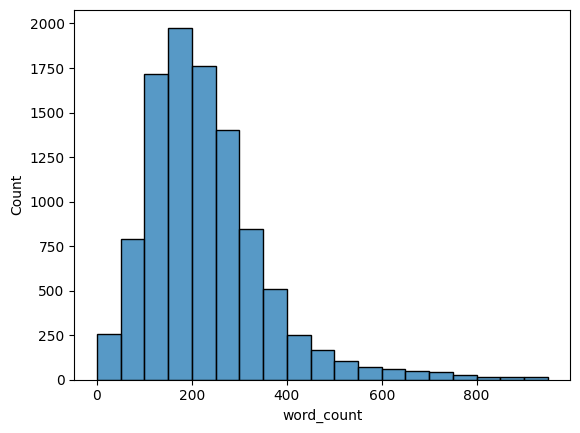

In [43]:
sns.histplot(df, x='word_count', bins=[i*50 for i in range(20)])

In [44]:
df['word_count'].quantile(0.9)

384.0

<Axes: xlabel='mood_cats', ylabel='Count'>

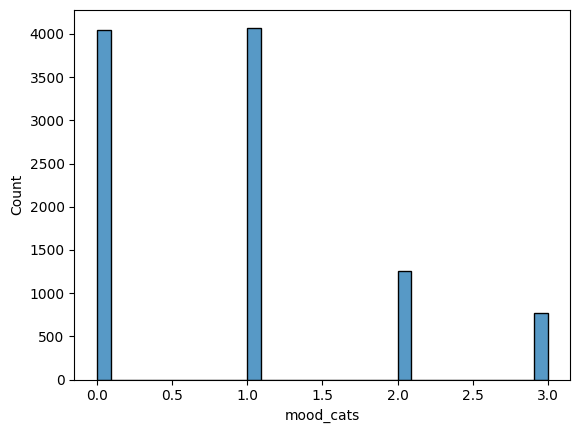

In [45]:
sns.histplot(df, x='mood_cats')

In [46]:
df = df[(df['word_count'] < 400) & (df['word_count']  >= 100)].reset_index()

<Axes: xlabel='word_count', ylabel='Count'>

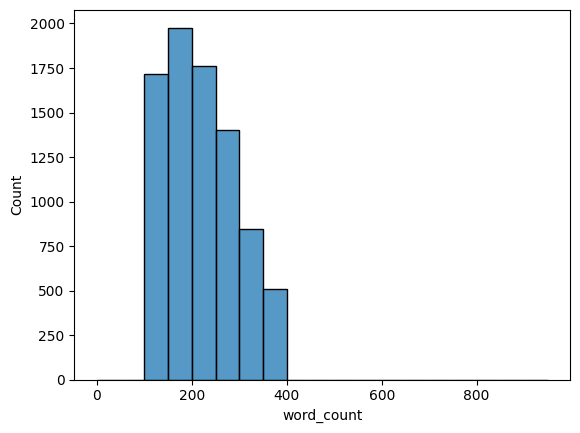

In [47]:
sns.histplot(df, x='word_count', bins=[i*50 for i in range(20)])

<Axes: xlabel='mood_cats', ylabel='Count'>

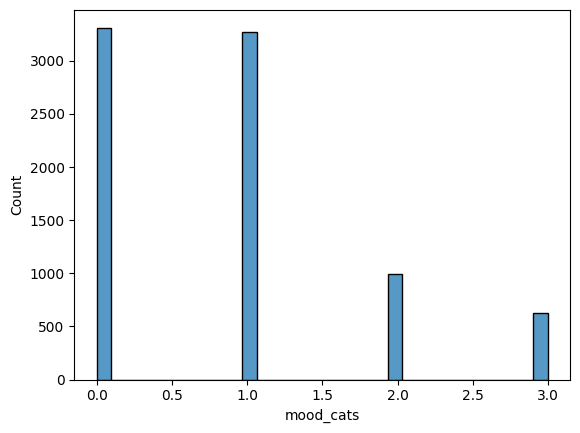

In [48]:
sns.histplot(df, x='mood_cats')

In [49]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df[['lyrics','lyrics_filename']], df['mood_cats'], random_state=0, test_size=0.15)

In [61]:
train = pd.concat([X_train, y_train],axis=1)
test = pd.concat([X_test, y_test],axis=1)

In [62]:
DATA_DIR = '/content/drive/MyDrive/APS360 Group/Data/'
train.to_csv(DATA_DIR + 'hf_train.csv')
test.to_csv(DATA_DIR + 'hf_test.csv')